In [25]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

To record this dataset, the sensors were on the station side of the Pier

In [ ]:
df = pd.read_csv('TBS-ecotriplet\\2025_08_10.txt', delimiter='\t')

In [12]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,08/05/25,11:45:39,700.0,4130.0,695.0,1021.0,460.0,4130.0,533.0,NaN
1,08/05/25,11:45:41,700.0,4130.0,695.0,1021.0,460.0,4130.0,533.0,NaN
2,08/05/25,11:45:42,700.0,4130.0,695.0,1021.0,460.0,4130.0,533.0,NaN
3,08/05/25,11:45:43,700.0,4130.0,695.0,1020.0,460.0,4130.0,533.0,NaN
4,08/05/25,11:45:44,700.0,4130.0,695.0,1020.0,460.0,4130.0,532.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4484,08/10/25,17:21:53,700.0,4130.0,695.0,1294.0,460.0,4130.0,551.0,NaN
4485,08/10/25,17:21:54,700.0,4130.0,695.0,1296.0,460.0,4130.0,551.0,NaN
4486,08/10/25,17:21:55,700.0,4130.0,695.0,1294.0,460.0,4130.0,550.0,NaN
4487,08/10/25,17:21:56,700.0,4130.0,695.0,1295.0,460.0,4130.0,550.0,NaN


In [13]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [14]:

#df['cDOM'] = pd.to_numeric(df['cDOM'], errors='coerce')


In [15]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [16]:
#calculate the parameters according to the manual
chl = 0.0122*(df['chl']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM'].astype(float)-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_15904\1465471502.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [17]:
datetime = df['datetime'] 

(0.0, 5.0)

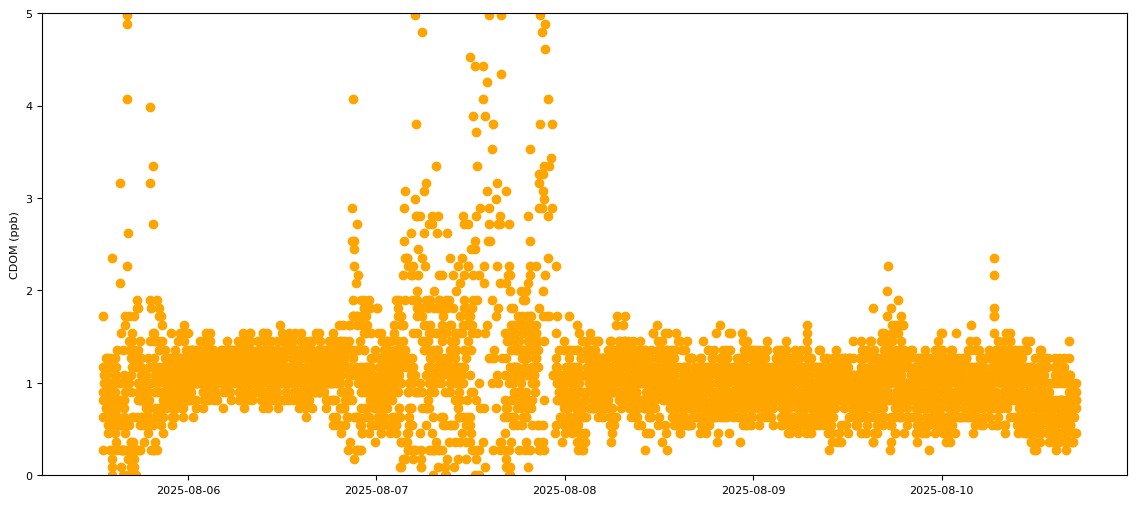

In [19]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=8)
plt.scatter(datetime[:], cDOM[:], color='orange')
plt.ylabel('CDOM (ppb)')
plt.ylim(0, 5)

(0.0, 0.009)

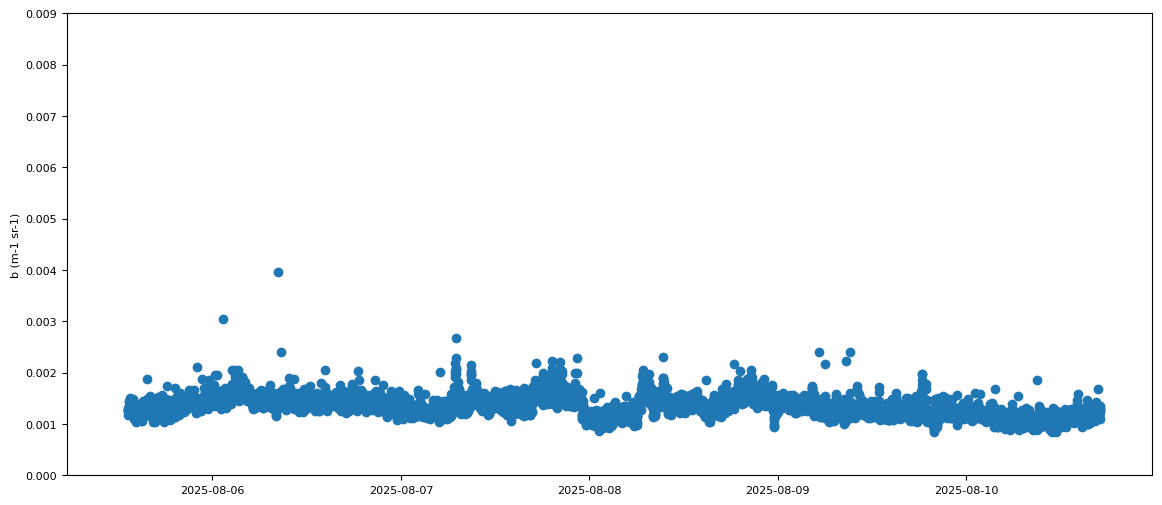

In [20]:
plt.figure(figsize=(14, 6))
plt.scatter(datetime[:], turb[:])
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
plt.ylim(0,0.009)

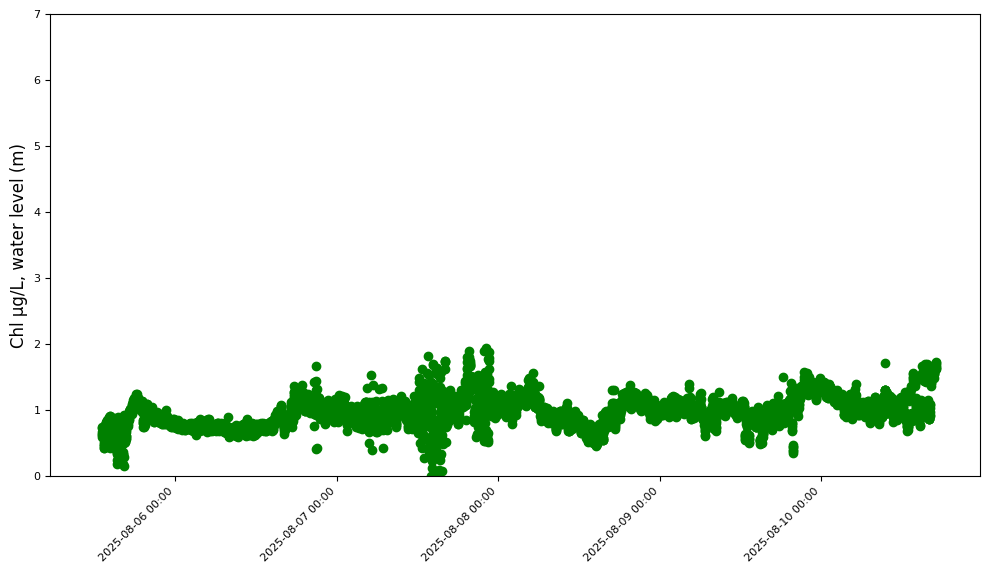

In [21]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(datetime[:], chl[:], color = 'green', label='chl')
#ax.plot(datetime_vann, level/100, color = 'blue', label='water level')
ax.set_ylim(0,7)

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.set_ylabel('Chl µg/L, water level (m)', fontsize =(12)) 

plt.show()


In [22]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl, 'turb': turb, 'cDOM':cDOM})

In [23]:
print(calibrated_data)

                datetime      chl      turb      cDOM
0    2025-08-05 11:45:39  11.8340  0.012101  369.5115
1    2025-08-05 11:45:41  11.8340  0.012101  369.5115
2    2025-08-05 11:45:42  11.8340  0.012101  369.5115
3    2025-08-05 11:45:43  11.8218  0.012101  369.5115
4    2025-08-05 11:45:44  11.8218  0.012101  369.5115
...                  ...      ...       ...       ...
4484 2025-08-10 17:21:53  15.1646  0.012101  369.5115
4485 2025-08-10 17:21:54  15.1890  0.012101  369.5115
4486 2025-08-10 17:21:55  15.1646  0.012101  369.5115
4487 2025-08-10 17:21:56  15.1768  0.012101  369.5115
4488                 NaT      NaN       NaN       NaN

[4489 rows x 4 columns]


In [24]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_08_10.txt', sep='\t')